# Text Filtering

In [83]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [84]:
# Use AzureML's data collector to log various metrics!
#from azureml.logging import current_scriptrun
#logger = current_scriptrun()

import string, re
import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
import azureml
from __future__ import division
import numpy as np
import nltk
from nltk.corpus import stopwords
from azure.storage.blob import BlockBlobService

# import libraries
from __future__ import print_function
import numpy as np
from six.moves import zip
import json
import warnings
import pandas as pd
from pandas import DataFrame   
import pickle
import re
import sys 
import azureml
import string
from scipy import stats
import pip
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer     
from keras.preprocessing import sequence
import os
import tempfile  
import logging
import gensim
from gensim.models import Phrases, phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec as wv
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models, similarities
from IPython.display import SVG
import cloudpickle
import csv
import mkl
import matplotlib.pyplot as plt
import h5py
from keras.models import load_model
import re
import io
from os.path import dirname, join
import regex

Imprt source text and write to a pandas dataframe

In [85]:
import os
os.getcwd()

'C:\\Users\\pattyry\\Documents\\AzureML\\NextAgenda_CodeStory\\NextAgenda_CodeStory'

In [86]:
import pickle
with open('filteredrawtext.pkl', 'rb') as f:
    data = pickle.load(f)
    print("Data unpickled")
    import pandas as pd
data = pd.DataFrame(data)

data.shape

Data unpickled


(996, 3)

Review data

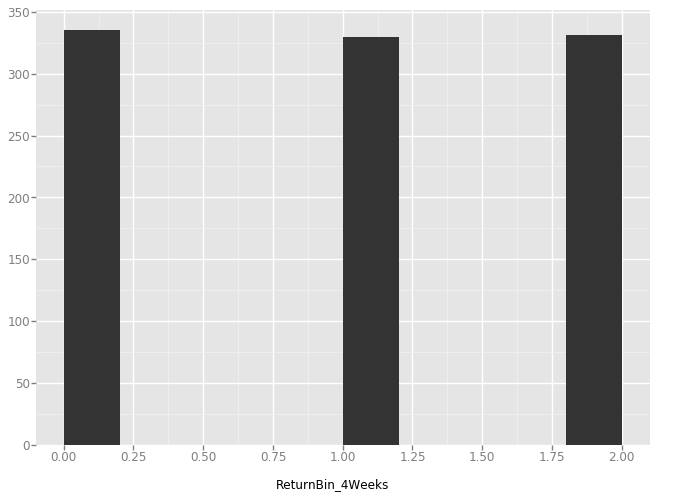

<ggplot: (-9223371915495395184)>

In [89]:
import ggplot
from ggplot import *
ggplot(data1, aes(x='ReturnBin_4Weeks')) + \
    geom_histogram() 

In [90]:
data.head(3)

,fulltext,ReturnBin_4Weeks,ReturnBin_26Weeks
44198,OGEN. MANAGEMENTS DISCUSSION AND ANALYSIS O...,2,0
11098,OGEN. 1,2,0
60944,OGEN. 52,2,0


Discard data not of interest

In [91]:
data1=data.drop(['ReturnBin_26Weeks'], axis=1)
print(data1.shape)
print(data1.head(2))
#print(data1.dtypes)
thedata = data1
thedata['fulltext'] = thedata['fulltext'].str.encode('utf-8')
thedata['fulltext'] = thedata['fulltext'].str.lower()

(996, 2)
                                                fulltext ReturnBin_4Weeks
44198  OGEN.   MANAGEMENTS DISCUSSION AND ANALYSIS O...                2
11098                                          OGEN.   1                2


In [92]:

##########################################
# clean up the text in the data with regex
##########################################


def clean_text(row):
    text = str(row['fulltext'])

    # Remove newline characters
    cleantext = text.replace('\r\n', ' ')

    # Convert HTML punctuation chaaracters
    cleantext = cleantext.replace('.', '')
    cleantext = cleantext.replace(',', '')
    cleantext = cleantext.replace('!', '')
    cleantext = cleantext.replace('$;', '')
    cleantext = cleantext.replace(';', '')
    cleantext = cleantext.replace(')', '')
    cleantext = cleantext.replace('(', '') 
    cleantext = cleantext.replace('', '')   
    cleantext = cleantext.replace('>', '')  
    cleantext = cleantext.replace('<', '')  
    cleantext = cleantext.replace(' the ', ' ')  
    cleantext = cleantext.replace(' of ', ' ')   
    cleantext = cleantext.replace(' in ', ' ')  
    cleantext = cleantext.replace(' and ', ' ')  
    cleantext = cleantext.replace(' by ', ' ')  
    cleantext = cleantext.replace(' to ', ' ')  
    cleantext = cleantext.replace(' at ', ' ')  
    cleantext = cleantext.replace(' on ', ' ') 
    cleantext = cleantext.replace(' for ', ' ')  

    #remove non alpha characters and specific noise
    cleantext = re.sub(r'\d+', '',cleantext)
    cleantext = re.sub(r'^b','',cleantext)
    cleantext = re.sub(r'[^\w]',' ',cleantext)
    cleantext = cleantext.replace('xc xs', '')  
    cleantext = cleantext.replace('xe xs', '')  
    cleantext = cleantext.replace('xc xS', '')  
    cleantext = cleantext.replace('xe xS', '')  
    cleantext = cleantext.replace('xc xa', '')  
    cleantext = cleantext.replace('xe xa', '')  
    cleantext = cleantext.replace(' xc xc x', '')  
    cleantext = cleantext.replace(' xc', '')  
    cleantext = cleantext.replace(' xe', '')  
    cleantext = cleantext.replace(' xs', '')  

    #remove specific noise
    cleantext = cleantext.translate(str.maketrans({'‘':' ','’':' '}))
    cleantext = cleantext.translate(str.maketrans({',':'',',':''}))
    cleantext = cleantext.translate(str.maketrans({'[':'',']':''}))
    cleantext = cleantext.translate(str.maketrans({'"':'','%':''}))
    cleantext = cleantext.translate(str.maketrans({'^':'','*':''}))

    #remove punctuation
    punctpattern = re.compile('[%s]' % re.escape(string.punctuation))
    cleanttext = re.sub(punctpattern,'', cleantext)

    #remove single letter word
    cleantext = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', cleantext) 

    # Remove extra spaces
    cleantext = re.sub('\s+', ' ', cleantext).strip()

    return cleantext

#apply regex fixes to the input text column


In [93]:
thedata['CleanText'] = thedata.apply(clean_text, axis=1)
justcleandocs=thedata.drop(['fulltext'], axis=1)
thedata.head(2)

,fulltext,ReturnBin_4Weeks,CleanText
44198,b'ogen. management\xc2\x92s discussion and a...,2,ogen management discussion analysis financial ...
11098,b'ogen. 1',2,ogen


In [99]:
with open('cleanedandfiltered.pkl', 'wb') as f:
    pickle.dump(thedata, f)
#df = pd.read_pickle(file_name)

In [100]:
#save a cleaned copy to inspect
justcleandocs.to_csv('cleandata.tsv', sep='\t', encoding='utf-8')


In [101]:
documents = justcleandocs['CleanText'].values

In [102]:
len(documents)

996

In [103]:
documents[0]

'ogen management discussion analysis financial condition results operations'